# `CARDIOVASCULAR DISEASE PROJECT`

#### This aim of this project is to develop a Machine Learning model to predict the likelihood of Cardiovasular diseases based on relevant health parameters.

## Data Description

|Attribute| Description| Data Type| Domain|
|----|----|----|----|
|Age| Patient age in year| Numerical| 29 to 77|
|Sex| Gender| Binary| 0 = female, 1 = male|
|Chest_pain| Chest pain type| Nominal| 1 = typical angina, 2 = atypical angina, 3 = nonanginal pain, 4 = asymptomatic|
|Rest_bps| Resting blood pressure| Numerical| 94 to 200| 
|Chol| Serum cholesterol| Numerical| 126 to 564|
|Blood_sugar| Fasting blood sugar >120 mg/đL| Binary| 0 = false, 1 = True|
|Rest_ecg| Resting electrocardiographic result| Nominal| 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy|
|Max_heart_rate| Maximum heart rate| Numerical| 71 to 200|
|Ex_ang| Exercise induced angina| Binary| 0 = no, 1= yes|
|Old_peak| Old peak| Numerical| Continuous (0 to 6.2)|
|Slope| Slope of peak exercise ST segment| Nominal| 1 = upsloping, 2 = flat, 3 = downsloping|
|Vessel| Number of major vessels| Numerical| 0 to 3|
|Thal| Defect type| Nominal| 3 = normal, 6 = fixed defect, 7 = reversible defect|
|Target| Heart disease| Ordinal| 0 = very unlikely, 1 = unlikely, 2 = possible, 3 = likely, 4 = very likely|




## `Step 0:` Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, f_oneway

## `Step 1:` Import the dataset to DataFrame

In [2]:
# Import csv file to dataframe

df = pd.read_csv('Cardio data.csv')

# Show a sample of the data

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0


## `Step 2:` Data Understanding

In [3]:
# Check the total rows and columns
df.shape

(1592, 14)

In [4]:
# Check the data types
df.dtypes

age         float64
sex         float64
cp          float64
trestbps      int64
chol        float64
fbs         float64
restecg     float64
thalach       int64
exang       float64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object

In [5]:
# Adjust column names
df=df.rename(columns={'age':'Age', 'sex':'Sex', 'cp':'Chest_pain', 'trestbps':'Rest_bps', 'chol':'Chol', 'fbs':'Blood_sugar', 'restecg':'Rest_ecg', 'thalach':'Max_heart_rate',
       'exang':'Ex_ang', 'oldpeak':'Old_peak', 'slope':'Slope', 'ca':'Vessel', 'thal':'Thal', 'target':'Target'})

# Check to see changes

df.head()

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,63.0,1.0,1.0,145,233.0,1.0,2.0,150,0.0,2.3,3.0,0,6.0,0
1,67.0,1.0,4.0,160,286.0,0.0,2.0,108,1.0,NaN,2.0,3,3.0,2
2,67.0,1.0,4.0,120,229.0,0.0,2.0,129,1.0,2.6,2.0,2,7.0,1
3,37.0,1.0,3.0,130,250.0,0.0,NaN,187,0.0,3.5,3.0,0,3.0,0
4,41.0,0.0,2.0,130,204.0,0.0,2.0,172,0.0,1.4,1.0,0,3.0,0


In [6]:
# Check for total missing values per feature

df.isna().sum()

Age                79
Sex                31
Chest_pain        159
Rest_bps            0
Chol               63
Blood_sugar        79
Rest_ecg            7
Max_heart_rate      0
Ex_ang             47
Old_peak           31
Slope              54
Vessel              0
Thal                7
Target              0
dtype: int64

In [7]:
# Handle missing data based on the feature

def handle_missing_data(df):
    # Fill missing numerical data with the mean of the column
    for column in ['Age', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak']:
        df[column].fillna(df[column].mean(), inplace=True)
    
    # Fill missing binary and nominal data with the mode of the column
    for column in ['Sex', 'Chest_pain', 'Blood_sugar', 'Rest_ecg', 'Ex_ang', 'Slope', 'Thal']:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # Check if there are any remaining missing values
    missing_data = df.isnull().sum()
    return df, missing_data

handle_missing_data(df)

(       Age  Sex  Chest_pain  Rest_bps   Chol  Blood_sugar  Rest_ecg  \
 0     63.0  1.0         1.0       145  233.0          1.0       2.0   
 1     67.0  1.0         4.0       160  286.0          0.0       2.0   
 2     67.0  1.0         4.0       120  229.0          0.0       2.0   
 3     37.0  1.0         3.0       130  250.0          0.0       0.0   
 4     41.0  0.0         2.0       130  204.0          0.0       2.0   
 ...    ...  ...         ...       ...    ...          ...       ...   
 1587  52.0  1.0         3.0       172  199.0          1.0       0.0   
 1588  44.0  1.0         2.0       120  263.0          0.0       0.0   
 1589  56.0  0.0         0.0       140  294.0          0.0       2.0   
 1590  57.0  1.0         4.0       140  192.0          0.0       0.0   
 1591  67.0  1.0         4.0       160  286.0          0.0       2.0   
 
       Max_heart_rate  Ex_ang  Old_peak  Slope  Vessel  Thal  Target  
 0                150     0.0  2.300000    3.0       0   6.0   

In [8]:
# Confirm results

df.isna().sum()

Age               0
Sex               0
Chest_pain        0
Rest_bps          0
Chol              0
Blood_sugar       0
Rest_ecg          0
Max_heart_rate    0
Ex_ang            0
Old_peak          0
Slope             0
Vessel            0
Thal              0
Target            0
dtype: int64

The missing values have been sorted using mean for numerical values and mode for nominal ones

In [9]:
# Define data types for each column
data_types = {
    'Age': int,
    'Sex': int,
    'Chest_pain': int,
    'Rest_bps': int,
    'Chol': float,
    'Blood_sugar': int,
    'Rest_ecg': int,
    'Max_heart_rate': int,
    'Ex_ang': int,
    'Old_peak': float,
    'Slope': int,
    'Vessel': int,
    'Thal': int,
    'Target': int
}

# Cast each feature/column to its necessary datatype
df = df.astype(data_types)


In [10]:
df.isna().sum()

Age               0
Sex               0
Chest_pain        0
Rest_bps          0
Chol              0
Blood_sugar       0
Rest_ecg          0
Max_heart_rate    0
Ex_ang            0
Old_peak          0
Slope             0
Vessel            0
Thal              0
Target            0
dtype: int64

In [11]:
df.duplicated().sum()

562

In [12]:
# Drop duplicates excpet first occurence
df = df.drop_duplicates()

In [13]:
# Checking total number of duplicates
df.duplicated().sum()

0

In [14]:
df.shape

(1030, 14)

In [15]:
# Reset index to represent actual DataFrame after removing duplicates
df = df.reset_index(drop=True)
df.head()

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,63,1,1,145,233.0,1,2,150,0,2.300000,3,0,6,0
1,67,1,4,160,286.0,0,2,108,1,1.066496,2,3,3,2
2,67,1,4,120,229.0,0,2,129,1,2.600000,2,2,7,1
3,37,1,3,130,250.0,0,0,187,0,3.500000,3,0,3,0
4,41,0,2,130,204.0,0,2,172,0,1.400000,1,0,3,0


The duplicated rows have been dropped and index reset

## `Step 3:` Feature Understanding (EDA)

This process is to understand each feature (univariate analysis)

In [16]:
# Check statistical information of the dataset now that missing values and duplicates have been handled

df.describe()

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,54.252427,0.688350,1.904854,131.567961,246.895584,0.137864,0.793204,150.336893,0.306796,1.034752,1.476699,0.683495,3.589320,0.881553
std,8.775815,0.463393,1.543876,17.829904,49.876342,0.344925,0.845127,22.866837,0.461388,1.140835,0.625767,0.966303,1.889895,0.856887
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,2.000000,130.000000,245.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,272.500000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


Text(0, 0.5, 'Frequency')

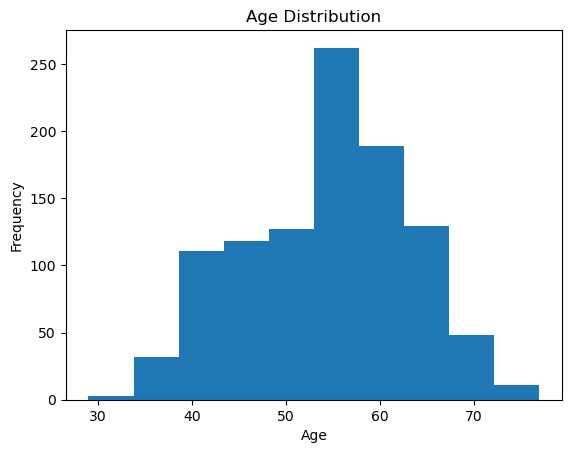

In [17]:
# View Age Distribution
ax=df['Age'].plot(kind='hist', title='Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Count')

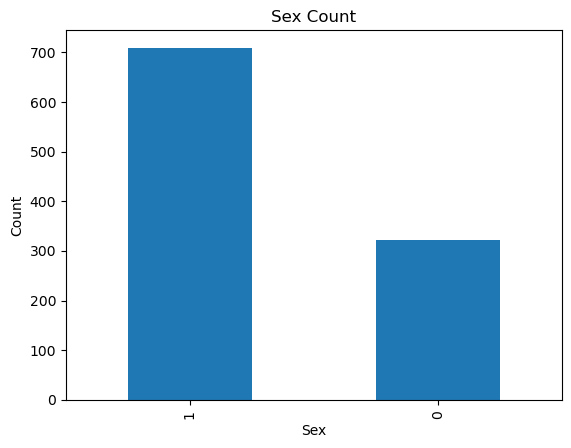

In [18]:
# Visualize Sex Count
ax=df['Sex'].value_counts().plot(kind='bar', title='Sex Count')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')

There are more Males than Females

Text(0, 0.5, 'Chest Pain')

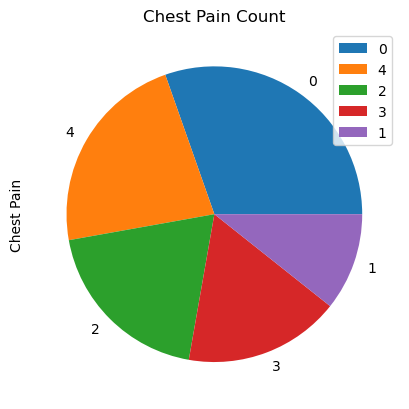

In [19]:
# Visualize Chest Pain Count
ax = df['Chest_pain'].value_counts().plot(kind='pie', title='Chest Pain Count', legend=True)
ax.set_ylabel('Chest Pain')

Frequency of Chest pain based on the type:
\
1 = typical angina
\
2 = atypical angina
\
3 = nonanginal pain
\
4 = asymptomatic

Asymptomatic has the highest count with 546 patients

In [20]:
num_rows_with_zero = (df['Chest_pain'] == 0).sum()
print("Total number of rows with value 0 in 'Chp' column:", num_rows_with_zero)

Total number of rows with value 0 in 'Chp' column: 313


There are 313 samples with the value 0 which is undefined. 315 is a lot of valuable information to drop from the dataset but 0 is underfined so let's drop the chest_pain column

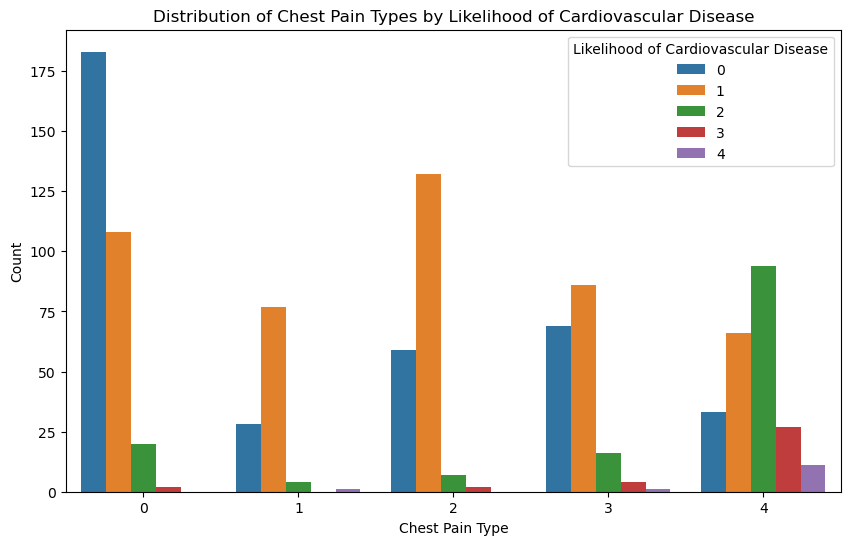

In [21]:
# Visualize Chest Pain Types by Likelihood of Cardiovascular Disease
plt.figure(figsize=(10, 6))
sns.countplot(x='Chest_pain', hue='Target', data=df)
plt.title('Distribution of Chest Pain Types by Likelihood of Cardiovascular Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Likelihood of Cardiovascular Disease')
plt.show()


The undefined value (0) has a high count and is predominantly associated with '0' likelihood of cardiovascular disease.
\
This suggests that the undefined or unknown chest pains are generally not associated with cardiovascular disease.
\
So we take 0 to mean `Undefined Chest Pain`

In [22]:
df.shape

(1030, 14)

<Axes: ylabel='Frequency'>

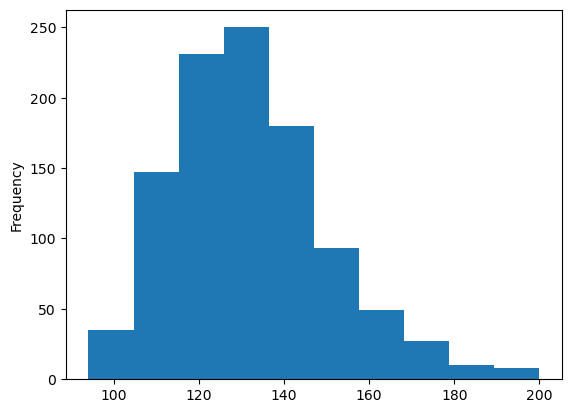

In [23]:
# Visualize Resting Blood Pressure Distribution
df['Rest_bps'].plot(kind='hist', title='')

Text(0, 0.5, 'Frequency')

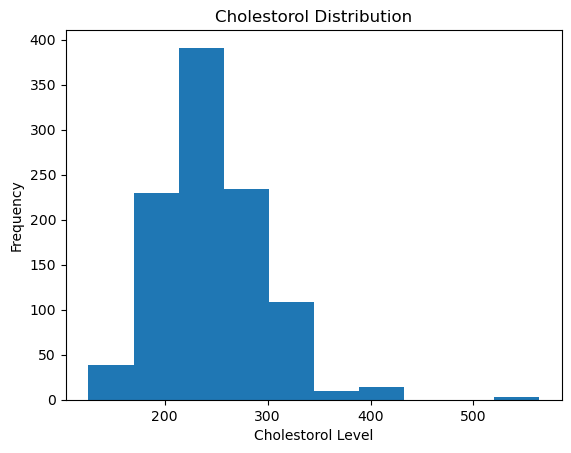

In [24]:
# Visualize Cholesterol Distribution
ax=df['Chol'].plot(kind='hist', title='Cholestorol Distribution')
ax.set_xlabel('Cholestorol Level')
ax.set_ylabel('Frequency')


## `Step 4:` Feature Relationship

Finding the relationships between the features to identify the best feature for building a prediction model

`Numerical Values` Numerical values are best handled using correlation statistics or scatterplots to visualize the data

The Numerical Features in the dataset are: Age, Rest_bps, Chol, Max_heart_rate and Old_peak

In [25]:
# Define binary, nominal and numerical features based on data description
numerical_features = ['Age', 'Chest_pain', 'Rest_bps', 'Chol', 'Max_heart_rate', 'Old_peak', 'Vessel']
binary_features = ['Sex', 'Blood_sugar', 'Ex_ang']
nominal_features = ['Rest_ecg', 'Slope', 'Thal']


In [26]:
# Perform chi-square test for each nominal feature with the target variable
chi2_results_nominal = {}
for feature in nominal_features:
    contingency_table = pd.crosstab(df[feature], df['Target'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results_nominal[feature] = p_value

# Sort the nominal features based on p-value in ascending order
sorted_features_nominal = sorted(chi2_results_nominal.items(), key=lambda x: x[1])

# Select nominal features with significant association (low p-value) with the target variable
selected_nominal_features = [feature for feature, p_value in sorted_features_nominal if p_value < 0.05]

In [27]:

# Calculate point-biserial correlation coefficients for binary features with the target variable
binary_corr_coeffs = {}
for feature in binary_features:
    corr_coeff, _ = pointbiserialr(df[feature], df['Target'])
    binary_corr_coeffs[feature] = corr_coeff


In [28]:

# Calculate Spearman's rank correlation coefficients for numerical features with the ordinal target variable
spearman_corr_coeffs = {}
for feature in numerical_features:
    corr_coeff, _ = spearmanr(df[feature], df['Target'])
    spearman_corr_coeffs[feature] = corr_coeff


In [29]:

# Select features with significant correlation coefficients
selected_features = selected_nominal_features + [feature for feature, corr_coeff in binary_corr_coeffs.items() if abs(corr_coeff) > 0.1] + \
                    [feature for feature, corr_coeff in spearman_corr_coeffs.items() if abs(corr_coeff) > 0.1]

print("Selected Features:", selected_features)


Selected Features: ['Thal', 'Rest_ecg', 'Slope', 'Ex_ang', 'Chest_pain']


#### `Selected Features:`
Thal
\
Rest_ecg
\
Slope
\
Ex_ang
\
Chest_pain

In [30]:
Selected_features = df[['Thal', 'Rest_ecg', 'Slope', 'Ex_ang', 'Chest_pain']]

## `Step 5:` Model Selection

#### Normalize Numerical Features for Data Splitting

In [31]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the numerical features directly in the original dataframe
df_normalized = df.copy()
df_normalized[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now df_normalized contains the entire dataset with normalized numerical features
df_normalized.head()

,Age,Sex,Chest_pain,Rest_bps,Chol,Blood_sugar,Rest_ecg,Max_heart_rate,Ex_ang,Old_peak,Slope,Vessel,Thal,Target
0,0.708333,1,0.25,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.00,6,0
1,0.791667,1,1.00,0.622642,0.365297,0,2,0.282443,1,0.172015,2,0.75,3,2
2,0.791667,1,1.00,0.245283,0.235160,0,2,0.442748,1,0.419355,2,0.50,7,1
3,0.166667,1,0.75,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.00,3,0
4,0.250000,0,0.50,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.00,3,0


#### Split Data into Training and Testing

## ``Step 5``: Model Selection

Project objective: Predict the likelihood of cardiovascular diseases\
\
Predictor: Thal, Resting Blood Pressure, Blood vessel, Exercise angine, Maximum heart rate and Old peak\
\
Target: 0 = very unlikely, 1 = unlikely, 2 = possible, 3 = likely, 4 = very likely \
\
Problem type: Classification

### Split Dataset on `ALL Features`

#### Training and Testing on entire dataframe

In [32]:
# Create X and Y - Predictor and Target Variable

X = df_normalized.drop(columns='Target')
y = df['Target']

# Split into Training and Testing set for prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression Model

In [33]:
# Initialize and train the Logistic Regression model
# Logistic Regression Model
log_reg = LogisticRegression()
lr = log_reg.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, lr_pred)

c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree and Random Forests

In [34]:

# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
dt = decision_tree.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_pred)

#### Random Forests

In [35]:
# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier()
rf = random_forest.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)

### Support Vector Machines

In [36]:
# Initialize and train the Support Vector Machine classifier
# Support Vector Machines
SVM = SVC(kernel='rbf', random_state=42)
svm = SVM.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, svm_pred)

SVM Accuracy: 0.6456310679611651
\
Random Forest Accuracy: 0.5097087378640777
\
Decision Tree Accuracy: 0.5145631067961165
\
Logistic Regression Accuracy: 0.6407766990291263



## `Step 6:` Further Evaluation Metrics

#### Logistic Regression Model Evaluation

In [38]:
# Initialize and train the Logistic Regression model using selected features
log_reg_selected = LogisticRegression()
lr_selected = log_reg_selected.fit(X_train, y_train)

# Make predictions on the test set
lr_pred_selected = lr_selected.predict(X_test)

# Evaluate the Logistic Regression model using selected features
accuracy_lr_selected = accuracy_score(y_test, lr_pred_selected)
precision_lr_selected = precision_score(y_test, lr_pred_selected, average=None, zero_division=1)
recall_lr_selected = recall_score(y_test, lr_pred_selected, average=None)
f1_lr_selected = f1_score(y_test, lr_pred_selected, average=None)

# Print evaluation metrics
print(f'Logistic Regression Model Evaluation with Selected Features: \
    \nAccuracy: {accuracy_lr_selected} \nPrecision: {precision_lr_selected} \
        \nRecall: {recall_lr_selected} \nF1 Score: {f1_lr_selected}')

Logistic Regression Model Evaluation with Selected Features:     
Accuracy: 0.6407766990291263 
Precision: [0.74137931 0.65384615 0.47727273 1.         1.        ]         
Recall: [0.5443038 0.7311828 0.84      0.        0.       ] 
F1 Score: [0.62773723 0.69035533 0.60869565 0.         0.        ]


c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Model Evaluation

In [39]:
# Initialize and train the Decision Tree classifier using selected features
decision_tree_selected = DecisionTreeClassifier()
dt_selected = decision_tree_selected.fit(X_train, y_train)

# Make predictions on the test set
dt_pred_selected = dt_selected.predict(X_test)

# Evaluate the Decision Tree model using selected features
accuracy_dt_selected = accuracy_score(y_test, dt_pred_selected)
precision_dt_selected = precision_score(y_test, dt_pred_selected, average=None, zero_division=1)
recall_dt_selected = recall_score(y_test, dt_pred_selected, average=None)
f1_dt_selected = f1_score(y_test, dt_pred_selected, average=None)

# Print evaluation metrics for Decision Tree
print(f'Decision Tree Model Evaluation with Selected Features: \nAccuracy: {accuracy_dt_selected} \
    \nPrecision: {precision_dt_selected} \nRecall: {recall_dt_selected} \nF1 Score: {f1_dt_selected}')


Decision Tree Model Evaluation with Selected Features: 
Accuracy: 0.5194174757281553     
Precision: [0.57954545 0.62337662 0.27586207 0.         1.        ] 
Recall: [0.64556962 0.51612903 0.32       0.         0.        ] 
F1 Score: [0.61077844 0.56470588 0.2962963  0.         0.        ]


#### Random Forest Model Evaluation

In [41]:
# Initialize and train the Random Forest classifier using selected features
random_forest_selected = RandomForestClassifier()
rf_selected = random_forest_selected.fit(X_train, y_train)

# Make predictions on the test set
rf_pred_selected = rf_selected.predict(X_test)

# Evaluate the Random Forest model using selected features
accuracy_rf_selected = accuracy_score(y_test, rf_pred_selected)
precision_rf_selected = precision_score(y_test, rf_pred_selected, average=None, zero_division=1)
recall_rf_selected = recall_score(y_test, rf_pred_selected, average=None)
f1_rf_selected = f1_score(y_test, rf_pred_selected, average=None)

# Print evaluation metrics for Random Forest
print(f'Random Forest Model Evaluation with Selected Features: \nAccuracy: {accuracy_rf_selected} \
    \nPrecision: {precision_rf_selected} \nRecall: {recall_rf_selected} \nF1 Score: {f1_rf_selected}')

Random Forest Model Evaluation with Selected Features: 
Accuracy: 0.5194174757281553     
Precision: [0.58974359 0.59550562 0.28571429 0.         0.        ] 
Recall: [0.58227848 0.56989247 0.32       0.         0.        ] 
F1 Score: [0.58598726 0.58241758 0.30188679 0.         0.        ]


#### SVM Model Evaluation

In [42]:
# Initialize and train the SVM classifier using selected features
svm_selected = SVC(kernel='rbf', random_state=42)
svm_model_selected = svm_selected.fit(X_train, y_train)

# Make predictions on the test set
svm_pred_selected = svm_model_selected.predict(X_test)

# Evaluate the SVM model using selected features
accuracy_svm_selected = accuracy_score(y_test, svm_pred_selected)
precision_svm_selected = precision_score(y_test, svm_pred_selected, average=None, zero_division=1)
recall_svm_selected = recall_score(y_test, svm_pred_selected, average=None)
f1_svm_selected = f1_score(y_test, svm_pred_selected, average=None)

# Print evaluation metrics for SVM
print(f'SVM Model Evaluation with Selected Features: \nAccuracy: {accuracy_svm_selected} \
    \nPrecision: {precision_svm_selected} \nRecall: {recall_svm_selected} \nF1 Score: {f1_svm_selected}')


SVM Model Evaluation with Selected Features: 
Accuracy: 0.6456310679611651     
Precision: [0.77966102 0.69473684 0.40384615 1.         1.        ] 
Recall: [0.58227848 0.70967742 0.84       0.         0.        ] 
F1 Score: [0.66666667 0.70212766 0.54545455 0.         0.        ]


## `Step 7:` Hyperparameter Tuning for Models

#### Tuned Logistic Regression Model

In [44]:


# Define the grid of hyperparameters to search
param_grid_lr = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Perform grid search with cross-validation to find the best hyperparameters
lr_grid_search = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
lr_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params_lr = lr_grid_search.best_params_
best_score_lr = lr_grid_search.best_score_

# Get the best Logistic Regression model
best_lr_model = lr_grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s


[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.1s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ....................................C=1, penalty=l2; total time=   0.3s
[CV] END ....................................C=1, penalty=l2; total time=   0.1s
[CV] END ...................

#### Tuned Decision Tree Model

In [45]:

# Define the grid of hyperparameters to search
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criteria for quality of split
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
dt_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params_dt = dt_grid_search.best_params_
best_score_dt = dt_grid_search.best_score_

# Get the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_



Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

#### Tuned Random Forests Model

In [46]:

# Define the grid of hyperparameters to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_dep

#### Tuned SVM Model

In [47]:
# Define the grid of hyperparameters to search
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
svm_grid_search = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
svm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
best_params_svm = svm_grid_search.best_params_
best_score_svm = svm_grid_search.best_score_

# Get the best SVM model
best_svm_model = svm_grid_search.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale

In [ ]:
### Best Models from using all features

In [60]:
# Print the best model for Random Forest
print(f'Best Random Forest Score: {best_score_rf}')

# Print the best model for Logistic Regression
print(f'Best Logistic Regression Score: {best_score_lr}')

# Print out the results for Decision Tree
print(f'Best Decision Tree Score: {best_score_dt}')

# Print out the results for SVM
print(f'Best SVM Score: {best_score_svm}')


Best Random Forest Score: 0.5521877309682187
Best Logistic Regression Score: 0.6116555801921655
Best Decision Tree Score: 0.5497560975609757
Best SVM Score: 0.6310643015521065


### `Result:` 
SVM Model has the highest accuracy of 64% \
Logistic Regression comes in second with 61% 

In [49]:
df_normalized[selected_features]

,Thal,Rest_ecg,Slope,Ex_ang,Chest_pain
0,6,2,3,0,0.25
1,3,2,2,1,1.00
2,7,2,2,1,1.00
3,3,0,3,0,0.75
4,3,2,1,0,0.50
...,...,...,...,...,...
1025,7,0,1,0,0.75
1026,7,0,1,0,0.50
1027,3,2,2,0,0.00
1028,6,0,2,0,1.00


## `Model Selection with Selected Features`


#### Split Selected Data

In [50]:
# Splitting the dataset into selected features only
X_selected = df_normalized[selected_features]
y = df['Target']

# Splitting the selected features into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#### Logistic Regression Model Evaluation (Selected Features)

In [51]:

# Initialize and train the Logistic Regression model using selected features
log_reg_selected = LogisticRegression()
lr_selected = log_reg_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using selected features
lr_pred_selected = lr_selected.predict(X_test_selected)

# Evaluate the Logistic Regression model using selected features
accuracy_lr_selected = accuracy_score(y_test, lr_pred_selected)
precision_lr_selected = precision_score(y_test, lr_pred_selected, average=None, zero_division=1)
recall_lr_selected = recall_score(y_test, lr_pred_selected, average=None)
f1_lr_selected = f1_score(y_test, lr_pred_selected, average=None)

# Print evaluation metrics
print(f'Logistic Regression Model Evaluation with Selected Features: \
    \nAccuracy: {accuracy_lr_selected} \nPrecision: {precision_lr_selected} \
        \nRecall: {recall_lr_selected} \nF1 Score: {f1_lr_selected}')


Logistic Regression Model Evaluation with Selected Features:     
Accuracy: 0.6067961165048543 
Precision: [0.66153846 0.62626263 0.47619048 1.         1.        ]         
Recall: [0.5443038  0.66666667 0.8        0.         0.        ] 
F1 Score: [0.59722222 0.64583333 0.59701493 0.         0.        ]


c:\Users\Timi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Model Evaluation (Selected Features)

In [52]:
# Initialize and train the Decision Tree classifier using selected features
decision_tree_selected = DecisionTreeClassifier()
dt_selected = decision_tree_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using selected features
dt_pred_selected = dt_selected.predict(X_test_selected)

# Evaluate the Decision Tree model using selected features
accuracy_dt_selected = accuracy_score(y_test, dt_pred_selected)
precision_dt_selected = precision_score(y_test, dt_pred_selected, average=None, zero_division=1)
recall_dt_selected = recall_score(y_test, dt_pred_selected, average=None)
f1_dt_selected = f1_score(y_test, dt_pred_selected, average=None)

# Print evaluation metrics for Decision Tree
print(f'Decision Tree Model Evaluation with Selected Features: \nAccuracy: {accuracy_dt_selected} \
    \nPrecision: {precision_dt_selected} \nRecall: {recall_dt_selected} \nF1 Score: {f1_dt_selected}')

Decision Tree Model Evaluation with Selected Features: 
Accuracy: 0.5776699029126213     
Precision: [0.60674157 0.59756098 0.47058824 0.         1.        ] 
Recall: [0.6835443  0.52688172 0.64       0.         0.        ] 
F1 Score: [0.64285714 0.56       0.54237288 0.         0.        ]


#### Random Forests Model Evaluation (Selected Features)

In [53]:
# Initialize and train the Random Forest classifier using selected features
random_forest_selected = RandomForestClassifier()
rf_selected = random_forest_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using selected features
rf_pred_selected = rf_selected.predict(X_test_selected)

# Evaluate the Random Forest model using selected features
accuracy_rf_selected = accuracy_score(y_test, rf_pred_selected)
precision_rf_selected = precision_score(y_test, rf_pred_selected, average=None, zero_division=1)
recall_rf_selected = recall_score(y_test, rf_pred_selected, average=None)
f1_rf_selected = f1_score(y_test, rf_pred_selected, average=None)

# Print evaluation metrics for Random Forest
print(f'Random Forest Model Evaluation with Selected Features: \nAccuracy: {accuracy_rf_selected} \
    \nPrecision: {precision_rf_selected} \nRecall: {recall_rf_selected} \nF1 Score: {f1_rf_selected}')

Random Forest Model Evaluation with Selected Features: 
Accuracy: 0.6213592233009708     
Precision: [0.69863014 0.64893617 0.44444444 0.         0.        ] 
Recall: [0.64556962 0.65591398 0.64       0.         0.        ] 
F1 Score: [0.67105263 0.65240642 0.52459016 0.         0.        ]


#### SVM Model Evaluation (Selected Features)

In [54]:
# Initialize and train the SVM classifier using selected features
svm_selected = SVC(kernel='rbf', random_state=42)
svm_model_selected = svm_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using selected features
svm_pred_selected = svm_model_selected.predict(X_test_selected)

# Evaluate the SVM model using selected features
accuracy_svm_selected = accuracy_score(y_test, svm_pred_selected)
precision_svm_selected = precision_score(y_test, svm_pred_selected, average=None, zero_division=1)
recall_svm_selected = recall_score(y_test, svm_pred_selected, average=None)
f1_svm_selected = f1_score(y_test, svm_pred_selected, average=None)

# Print evaluation metrics for SVM
print(f'SVM Model Evaluation with Selected Features: \nAccuracy: {accuracy_svm_selected} \
    \nPrecision: {precision_svm_selected} \nRecall: {recall_svm_selected} \nF1 Score: {f1_svm_selected}')

SVM Model Evaluation with Selected Features: 
Accuracy: 0.6310679611650486     
Precision: [0.78181818 0.66666667 0.40384615 1.         1.        ] 
Recall: [0.5443038  0.70967742 0.84       0.         0.        ] 
F1 Score: [0.64179104 0.6875     0.54545455 0.         0.        ]


#### `Result:` SVM Model has the highest accuracy of 63%

## `Hyperparameter Tuning for Models (w/ Selected Features)`

#### Logistic Regression

In [55]:
# Define the grid of hyperparameters to search for Logistic Regression
param_grid_lr_selected = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Initialize the Logistic Regression classifier
lr_selected = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Perform grid search with cross-validation to find the best hyperparameters
lr_grid_search_selected = GridSearchCV(estimator=lr_selected, param_grid=param_grid_lr_selected, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
lr_grid_search_selected.fit(X_train_selected, y_train)

# Get the best hyperparameters and the corresponding score
best_params_lr_selected = lr_grid_search_selected.best_params_
best_score_lr_selected = lr_grid_search_selected.best_score_

# Get the best Logistic Regression model
best_lr_model_selected = lr_grid_search_selected.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1,

#### Decision Tree

In [56]:
# Define the grid of hyperparameters to search for Decision Tree
param_grid_dt_selected = {
    'criterion': ['gini', 'entropy'],  # Criteria for quality of split
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree classifier
dt_selected = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
dt_grid_search_selected = GridSearchCV(estimator=dt_selected, param_grid=param_grid_dt_selected, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
dt_grid_search_selected.fit(X_train_selected, y_train)

# Get the best hyperparameters and the corresponding score for Decision Tree
best_params_dt_selected = dt_grid_search_selected.best_params_
best_score_dt_selected = dt_grid_search_selected.best_score_

# Get the best Decision Tree model
best_dt_model_selected = dt_grid_search_selected.best_estimator_

# Print out the best parameters and score for Decision Tree
print("Best Parameters for Decision Tree:", best_params_dt_selected)
print("Best Score for Decision Tree:", best_score_dt_selected)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

#### Random Forests

In [57]:
# Define the grid of hyperparameters to search for Random Forest
param_grid_rf_selected = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the Random Forest classifier
rf_selected = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
rf_grid_search_selected = GridSearchCV(estimator=rf_selected, param_grid=param_grid_rf_selected, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
rf_grid_search_selected.fit(X_train_selected, y_train)

# Get the best hyperparameters and the corresponding score for Random Forest
best_params_rf_selected = rf_grid_search_selected.best_params_
best_score_rf_selected = rf_grid_search_selected.best_score_

# Get the best Random Forest model
best_rf_model_selected = rf_grid_search_selected.best_estimator_

# Print out the best parameters and score for Random Forest
print("Best Parameters for Random Forest:", best_params_rf_selected)
print("Best Score for Random Forest:", best_score_rf_selected)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_dep

#### SVM

In [59]:
# Define the grid of hyperparameters to search for SVM
param_grid_svm_selected = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize the SVM classifier
svm_selected = SVC(random_state=42)

# Perform grid search with cross-validation to find the best hyperparameters
svm_grid_search_selected = GridSearchCV(estimator=svm_selected, param_grid=param_grid_svm_selected, cv=5, scoring='accuracy', verbose=2)

# Fit the grid search to the training data
svm_grid_search_selected.fit(X_train_selected, y_train)

# Get the best hyperparameters and the corresponding score for SVM
best_params_svm_selected = svm_grid_search_selected.best_params_
best_score_svm_selected = svm_grid_search_selected.best_score_

# Get the best SVM model
best_svm_model_selected = svm_grid_search_selected.best_estimator_

# Print out the best parameters and score for SVM
print("Best Parameters for SVM:", best_params_svm_selected)
print("Best Score for SVM:", best_score_svm_selected)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s


[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................

In [61]:
# Print the best model for Random Forest
print(f'Best Random Forest Score: {best_score_rf_selected}')

# Print the best model for Logistic Regression
print(f'Best Logistic Regression Score: {best_score_lr_selected}')

# Print out the results for Decision Tree
print(f'Best Decision Tree Score: {best_score_dt_selected}')

# Print out the results for SVM
print(f'Best SVM Score: {best_score_svm_selected}')

Best Random Forest Score: 0.558189209164819
Best Logistic Regression Score: 0.5946489283074649
Best Decision Tree Score: 0.5460901699926091
Best SVM Score: 0.5994678492239467
